In [1]:
import pandas as pd
import seaborn as sns
import requests

import matplotlib.pyplot as plt
from scipy.stats import pearsonr
df = pd.read_json("gme.json")
tesla = pd.read_json("tsla.json")
import numpy as np

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


#### The variables found on this dataset  is the 
Date- which was the date that the stock was watched, 
Open- This was the price when the market opened, 
High- the highest price it went for , 
Low - how low the price went for on a particular day, 
Close- how much it was sold when the market closed, 
Adj Close- The adjusted price of a stock when the market closes,
Volume- The number of the stocks being traded in a single day.

In [4]:
df["High"].max()

120.75

In [5]:
df[df["High"] == 120.75]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


### The date that GameStop reached an all time high was on 1/28/21(January 28, 2021).

#### This was our attempt to find the average of each month

In [8]:
#df["Month"] = df["Date"].dt.month

In [9]:
#jan = df[df["Month"] == 1] feb = df[df["Month"] == 2] mar = df[df["Month"] == 3] apr = df[df["Month"] == 4]
#may = df[df["Month"] == 5] jun = df[df["Month"] == 6] jul = df[df["Month"] == 7] aug = df[df["Month"] == 8]
#sep = df[df["Month"] == 9] octo = df[df["Month"] == 10] nov = df[df["Month"] == 11] dec = df[df["Month"] == 12]

#### Teacher Live
##### Note that we can also do ".year" and ".day" where the ".month" is.

In [11]:
type(df.loc[0]["Date"]).month

<attribute 'month' of 'datetime.date' objects>

In [12]:
count = 0
total = 0

for i in range(len(df)):
    if df.loc[i]["Date"].month == 1:
        avg = (df.loc[i]["High"] + df.loc[i]["Low"]) / 2
        total += avg
        count += 1
total/count

8.394146076404493

<Axes: xlabel='Low', ylabel='Volume'>

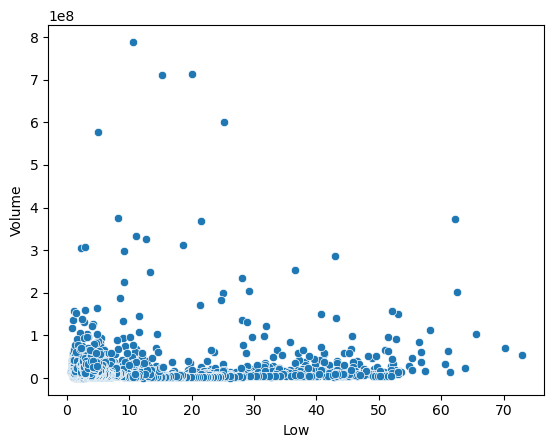

In [20]:
sns.scatterplot(data=df, x="Low", y="Volume")

In [21]:
df["Low"].corr(df["Volume"])

0.10259646883179026

After examining the scatterplot for Low vs. Volume, there appears to be no relationship between these variables. The Pearson correlation coefficient showed that is was a 0.1, meaning that the relationship is very, very weak. The direction is still positive.

<Axes: xlabel='Date', ylabel='High'>

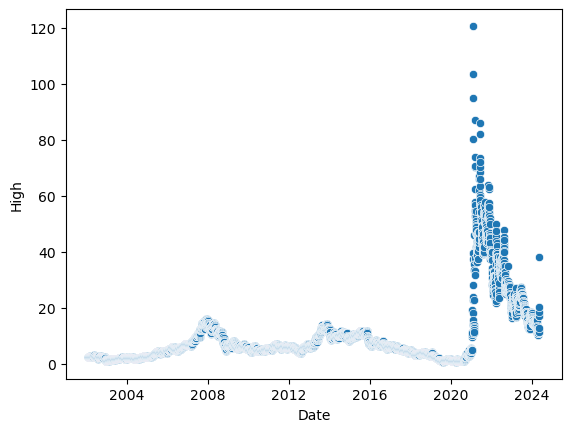

In [26]:
sns.scatterplot(data=df, x="Date", y="High")

In [28]:
#df["High"] = np.log(df["High"])

In [30]:
log_high = np.log(df["High"])
df["Log High"] = log_high

<Axes: xlabel='Date', ylabel='Log High'>

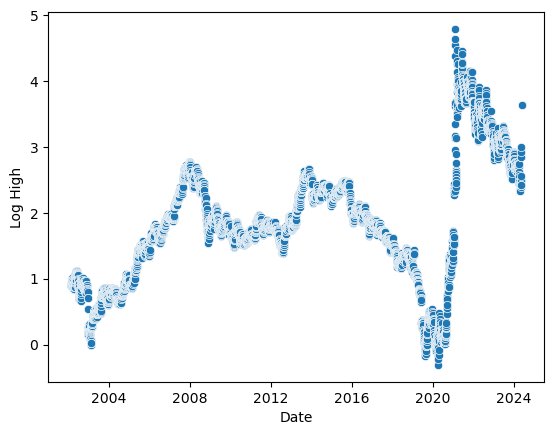

In [32]:
sns.scatterplot(data=df, x="Date", y="Log High")

Yeah

In [35]:
df['numeric_time'] = pd.to_datetime(df['Date']).astype('int64') // 10**9  # Converts to seconds since epoch
correlation = df['numeric_time'].corr(df['Log High'])

In [37]:
correlation

0.45097470030936637

### This is for exit ticket 9/25

In [40]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2516 non-null   datetime64[ns]
 1   open            2516 non-null   float64       
 2   high            2516 non-null   float64       
 3   low             2516 non-null   float64       
 4   close           2516 non-null   float64       
 5   volume          2516 non-null   int64         
 6   rsi_7           2516 non-null   float64       
 7   rsi_14          2516 non-null   float64       
 8   cci_7           2516 non-null   float64       
 9   cci_14          2516 non-null   float64       
 10  sma_50          2516 non-null   float64       
 11  ema_50          2516 non-null   float64       
 12  sma_100         2516 non-null   float64       
 13  ema_100         2516 non-null   float64       
 14  macd            2516 non-null   float64       
 15  boll

<Axes: xlabel='open', ylabel='high'>

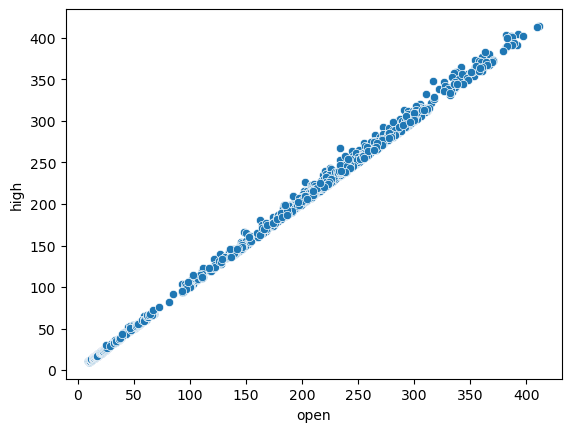

In [42]:
sns.scatterplot(data= tesla, x="open", y="high")

In [43]:
tesla["open"].corr(tesla["high"])

0.9996807064037777

In [46]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log High,numeric_time
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000,0.922273,1013558400
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600,0.935603,1013644800
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600,0.918788,1013731200
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400,0.906240,1014076800
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800,0.903712,1014163200


In [48]:
countYear = 0
totalYear = 0

for i in range(len(df)):
    if df.loc[i]["Date"].year == 2023:
        avg = (df.loc[i]["High"] + df.loc[i]["Low"]) / 2
        total += avg
        count += 1
total/count

12.302266176978417

In [49]:
#for i in range(len(df))
   # if df.loc[i]["Date"].year == 2023:
        

In [52]:
averageSamples = df.groupby(df["Date"].dt.year).size()

#### This was the first assignment : Find latest date, and average sample per year, exluding 2024

In [55]:
averageSamples



Date
2002    223
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    252
2020    253
2021    252
2022    251
2023    250
2024     92
dtype: int64

In [57]:
df["Date"].tail()

5595   2024-05-07
5596   2024-05-08
5597   2024-05-09
5598   2024-05-10
5599   2024-05-13
Name: Date, dtype: datetime64[ns]

In [63]:
years = {}   #.keys(), .values(), .items()

for i in range(len(df)):
    year = df.loc[i]["Date"].year
    if year not in years.keys() and year != 2024:
        years[year] = 1
    elif year in years.keys() and year != 2024:
        years[year] += 1        
sum(years.values())/len(years)

250.36363636363637

In [92]:
df.groupby(df["Date"].dt.year).size()

Date
2002    223
2003    252
2004    252
2005    252
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    252
2020    253
2021    252
2022    251
2023    250
2024     92
dtype: int64

In [94]:
df.drop(columns=["Adj Close"], inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5600 non-null   datetime64[ns]
 1   Open          5600 non-null   float64       
 2   High          5600 non-null   float64       
 3   Low           5600 non-null   float64       
 4   Close         5600 non-null   float64       
 5   Volume        5600 non-null   int64         
 6   Log High      5600 non-null   float64       
 7   numeric_time  5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 350.1 KB


### This is your API key: MT7V0TJ2WC00O5IX          ,25 is the limit per day
### This is your API key from Polygon Y9JhMh8Jt29YRrEwJchoNxZTHiaPMY4s
### For the example below, we switched to polygon.io

In [53]:
example = pd.DataFrame(df)

In [54]:
example.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


In [97]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://api.polygon.io/v2/aggs/ticker/GME/range/1/day/2024-05-14/2024-09-27?adjusted=false&sort=asc&apiKey=Y9JhMh8Jt29YRrEwJchoNxZTHiaPMY4s'
r = requests.get(url)
data = r.json()

print(data)

{'ticker': 'GME', 'queryCount': 94, 'resultsCount': 94, 'adjusted': False, 'results': [{'v': 206973629.0, 'vw': 51.6626, 'o': 64.83, 'c': 48.75, 'h': 64.83, 'l': 36, 't': 1715659200000, 'n': 2971358}, {'v': 131776493.0, 'vw': 38.3398, 'o': 40.31, 'c': 39.55, 'h': 42.35, 'l': 31, 't': 1715745600000, 'n': 1738808}, {'v': 76159605.0, 'vw': 31.1035, 'o': 33.98, 'c': 27.67, 'h': 35.24, 'l': 27.59, 't': 1715832000000, 'n': 837428}, {'v': 96046070.0, 'vw': 21.566, 'o': 21.86, 'c': 22.21, 'h': 22.41, 'l': 19.7, 't': 1715918400000, 'n': 925643}, {'v': 55261216.0, 'vw': 21.1343, 'o': 21.54, 'c': 23.14, 'h': 23.4, 'l': 18.94, 't': 1716177600000, 'n': 504233}, {'v': 49248792.0, 'vw': 21.434, 'o': 22.24, 'c': 22.12, 'h': 22.85, 'l': 20.0401, 't': 1716264000000, 'n': 330980}, {'v': 43521390.0, 'vw': 21.4924, 'o': 21.56, 'c': 21.12, 'h': 22.25, 'l': 20.76, 't': 1716350400000, 'n': 286155}, {'v': 30561058.0, 'vw': 19.7059, 'o': 21.4, 'c': 18.32, 'h': 21.4, 'l': 18.26, 't': 1716436800000, 'n': 231176},

In [70]:
def gather_data(start, end):
    #This is the dictionary muhahahahahahaha!!?!
    data = {"Date": [], "Open": [], "High": [], "Low": [], "Close": [], "Volume": []}

    startMonth = pd.to_datetime(start).month
    endMonth = pd.to_datetime(end).month

    for month in range(startMonth, endMonth + 1):
        for day in range(1, 26):
            if day < 10:
                current = '2024-0' + str(month) + '-0' + str(day)
            else: 
                current = '2024-0' + str(month) + '-0' + str(day)

            url = 'https://api.polygon.io/v1/open-close/GME/' + current + '?adjusted=false&sort=asc&apiKey=Y9JhMh8Jt29YRrEwJchoNxZTHiaPMY4s'
            r = requests.get(url)
            jsonData = r.json()
            data["Open"].append(jsonData['open'])
            data["High"].append(jsonData['high'])
            data["Low"].append(jsonData["low"])
            data["Close"].append(jsonData['close'])
            data["Volume"].append(jsonData['volume'])
            date = pd.to_datetime(current)
            data["Date"].append(date)

            break
        break

    return pd.DataFrame(data)


In [72]:
gather_data('2024-05-14', '2024-09-26')

,Date,Open,High,Low,Close,Volume
0,2024-05-01,11.03,11.32,10.7,10.91,2631514.0


In [74]:
#df2 = pd.read_json("recentGME.json")
#df.drop(["Adj Close"], inplace=True, axis=1)

FileNotFoundError: File recentGME.json does not exist